In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import folium
from folium.plugins import FloatImage

In [2]:
# Read Data set
df = pd.read_csv('data/michelin_my_maps.csv')

# Keep only columns of interest
df = df[['Name', 'Location', 'MinPrice', 'MaxPrice', 'Currency', 'Cuisine', 'Longitude', 'Latitude', 'Award', 'FacilitiesAndServices']]
df = df.dropna().reset_index(drop=True)

# Remove commas from number
df['MinPrice'] = df['MinPrice'].replace(',','', regex=True)
df['MaxPrice'] = df['MaxPrice'].replace(',','', regex=True)

# Convert to int
df[['MinPrice', 'MaxPrice']] = df[['MinPrice', 'MaxPrice']].astype(int)

# Define Exchange rate as of 09/09/2022 (Dictionary)
currencies = df['Currency'].unique()
converter = [0.71,0.10,0.14,0.094,1.0,1.0,1.16,0.14,0.12,0.13,0.0070,0.00073,0.032,1.04,
             0.27,0.027,0.19,0.0071,0.13,0.041,0.0025,0.21,0.0086]
exchange_rate = dict(zip(currencies, converter))

# Define Currency converter
def ToUSDConverter(amount, currency):
    c = exchange_rate.get(currency)
    return amount*c

# Convert Currency to USD
df['MinPriceUSD'] = df.apply(lambda x: ToUSDConverter(x['MinPrice'], x['Currency']), axis=1)
df['MaxPriceUSD'] = df.apply(lambda x: ToUSDConverter(x['MaxPrice'], x['Currency']), axis=1)

In [8]:
df

Name    Location  MinPrice  MaxPrice Currency  \
0            Les Amis   Singapore       225       460      SGD   
1              Odette   Singapore       298       428      SGD   
2                 Zén   Singapore       580       580      SGD   
3              Maaemo        Oslo      3500      3500      NOK   
4            Geranium  Copenhagen      3200      3200      DKK   
...               ...         ...       ...       ...      ...   
6481          Szóstka      Warsaw       180       180      PLN   
6482       Fiorentina      Cracow       175       290      PLN   
6483            Zazie      Cracow        41       113      PLN   
6484  Butchery & Wine      Warsaw       235       235      PLN   
6485          alewino      Warsaw       156       156      PLN   

                                    Cuisine   Longitude   Latitude  \
0                                    French  103.832040   1.306260   
1                       French Contemporary  103.851600   1.289646   
2                     European Contemporary  103.840420   1.279627   
3                  Modern Cuisine, Creative   10.758636  59.907529   
4                    Creative, Contemporary   12.572529  55.704085   
...                                     ...         ...        ...   
6481                 Polish, Modern Cuisine   21.012698  52.235803   
6482                       Creative, Polish   19.938179  50.055898   
6483                                 French   19.946949  50.051240   
6484  Meats and Grills, Traditional Cuisine   21.015495  52.228581   
6485            Polish, Traditional Cuisine   21.022057  52.225201   

                 Award                              FacilitiesAndServices  \
0     3 MICHELIN Stars  Air conditioning,American Express credit card,...   
1     3 MICHELIN Stars  Air conditioning,American Express credit card,...   
2     3 MICHELIN Stars  Air conditioning,American Express credit card,...   
3     3 MICHELIN Stars  Air conditioning,American Express credit card,...   
4     3 MICHELIN Stars  Air conditioning,American Express credit card,...   
...                ...                                                ...   
6481      Bib Gourmand  Air conditioning,American Express credit card,...   
6482      Bib Gourmand  Air conditioning,American Express credit card,...   
6483      Bib Gourmand  Air conditioning,Booking essential - dinner,Cr...   
6484      Bib Gourmand  American Express credit card,Booking essential...   
6485      Bib Gourmand  Air conditioning,American Express credit card,...   

      MinPriceUSD  MaxPriceUSD  
0          159.75       326.60  
1          211.58       303.88  
2          411.80       411.80  
3          350.00       350.00  
4          448.00       448.00  
...           ...          ...  
6481        37.80        37.80  
6482        36.75        60.90  
6483         8.61        23.73  
6484        49.35        49.35  
6485        32.76        32.76  

[6486 rows x 12 columns]

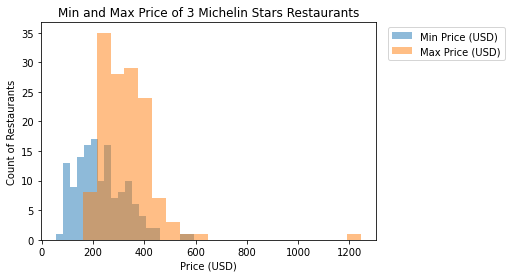

In [4]:
plt.hist(df[df['Award']=='3 MICHELIN Stars']['MinPriceUSD'], bins=20, alpha=0.5, label='Min Price (USD)')
plt.hist(df[df['Award']=='3 MICHELIN Stars']['MaxPriceUSD'], bins=20, alpha=0.5, label='Max Price (USD)')
plt.xlabel("Price (USD)")
plt.ylabel("Count of Restaurants")
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1)
plt.title('Min and Max Price of 3 Michelin Stars Restaurants')
plt.show()

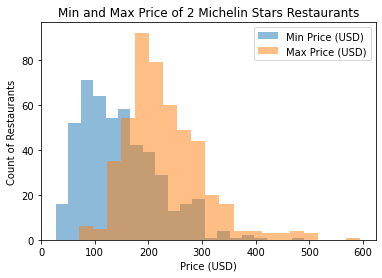

In [5]:
plt.hist(df[df['Award']=='2 MICHELIN Stars']['MinPriceUSD'], bins=20, alpha=0.5, label='Min Price (USD)')
plt.hist(df[df['Award']=='2 MICHELIN Stars']['MaxPriceUSD'], bins=20, alpha=0.5, label='Max Price (USD)')
plt.xlabel("Price (USD)")
plt.ylabel("Count of Restaurants")
plt.legend(loc='upper right')
plt.title('Min and Max Price of 2 Michelin Stars Restaurants')
plt.show()

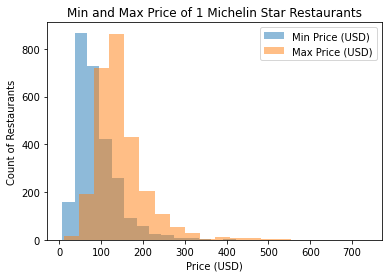

In [6]:
plt.hist(df[df['Award']=='1 MICHELIN Star']['MinPriceUSD'], bins=20, alpha=0.5, label='Min Price (USD)')
plt.hist(df[df['Award']=='1 MICHELIN Star']['MaxPriceUSD'], bins=20, alpha=0.5, label='Max Price (USD)')
plt.xlabel("Price (USD)")
plt.ylabel("Count of Restaurants")
plt.legend(loc='upper right')
plt.title('Min and Max Price of 1 Michelin Star Restaurants')
plt.show()

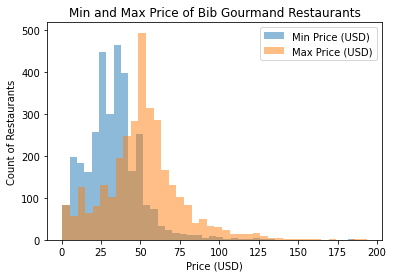

In [7]:
plt.hist(df[df['Award']=='Bib Gourmand']['MinPriceUSD'], bins=40, alpha=0.5, label='Min Price (USD)')
plt.hist(df[df['Award']=='Bib Gourmand']['MaxPriceUSD'], bins=40, alpha=0.5, label='Max Price (USD)')
plt.xlabel("Price (USD)")
plt.ylabel("Count of Restaurants")
plt.legend(loc='upper right')
plt.title('Min and Max Price of Bib Gourmand Restaurants')
plt.show()

In [37]:
# Create Folium Map 

legend = 'Data/MichelinLegend.PNG'

FloatImage(legend, bottom=0, left=86).add_to(m)

m = folium.Map(location=[40, 0], zoom_start=2,prefer_canvas=True)
FloatImage(legend, bottom=86, left=86).add_to(m)

for i in range(len(df)): #Top Cities
    if df['Award'][i] == '3 MICHELIN Stars':
        folium.Circle(location=[df['Latitude'][i], df['Longitude'][i]],
          popup=df['Name'][i],
          radius=15,
          color='red',
          fill=True,
          fill_color='purple').add_to(m)
    
    if df['Award'][i] == '2 MICHELIN Stars':
        folium.Circle(location=[df['Latitude'][i], df['Longitude'][i]],
          popup=df['Name'][i],
          radius=15,
          color='blue',
          fill=True,
          fill_color='blue').add_to(m) 
    
    if df['Award'][i] == '1 MICHELIN Star':
        folium.Circle(location=[df['Latitude'][i], df['Longitude'][i]],
          popup=df['Name'][i],
          radius=15,
          color='green',
          fill=True,
          fill_color='blue').add_to(m) 
        
    if df['Award'][i] == 'Bib Gourmand':
        folium.Circle(location=[df['Latitude'][i], df['Longitude'][i]],
          popup=df['Name'][i],
          radius=15,
          color='brown',
          fill=True,
          fill_color='blue').add_to(m) 
        

m